In [173]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")


In [174]:
import pandas as pd
import numpy as np


# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/ht-oliver/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Average Salmon Catchs by Region 1878-1997'}, xlabel='Region', ylabel='Average Catch'>

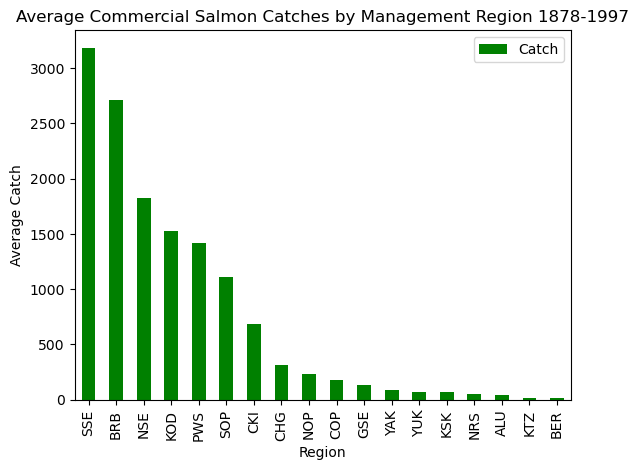

In [175]:
# FINAL CODE


# Import libraries
import pandas as pd
import numpy as np

    # Read in catch data
catch_data = pd.read_csv('data/salmon_data.csv')
    # Lots of NAs in 'notesRegCode' column. Drop 'notesRegCode' column and reassign, overwriting old df
catch_data = catch_data.drop(['notesRegCode'], axis = 1)
    # Some values in 'Catch' are listed as 'I' instead of 1
    # Use .replace function to replace 'I' in column 'Catch' with 1
catch_1 = catch_data['Catch'].replace('I', 1)
    # Overwrite catch_1 to equal row 400 of new catch_1 df
catch_1 = catch_1[400]
    # Replace column 400 of 'Catch' column in catch_data with catch_1 object
catch_data.loc[400, 'Catch'] = catch_1
    # 'Catch' column data type is currently 'object', convert 'Catch' to int64 data type and overwrite df
catch_data['Catch'] = catch_data['Catch'].astype('int64')
    # Group by Region, return the mean for column 'Catch'. Use sort_values to rank by average catch
avg_region = pd.DataFrame(catch_data.groupby('Region').mean('Catch').sort_values(by = 'Catch', ascending = False))

    # Create barplot of avg_region dataframe
avg_region.plot(kind = 'bar',
                y = 'Catch',
                title = 'Average Commercial Salmon Catches by Management Region 1878-1997',
                xlabel = 'Region',
                ylabel = 'Average Catch',
                color = 'green')
plot1


## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [176]:
# a.

catch_data = pd.read_csv('data/salmon_data.csv')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [177]:
# b.
# Look at nrows, ncols
print(catch_data.shape)

# Look at the number of unique values per column
print(catch_data.nunique())

# Look at the number of NA values per column
print(catch_data.isna().sum())


(8540, 5)
Region            18
Year             120
notesRegCode      29
Species            5
Catch           1879
dtype: int64
Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [178]:
notes_unique = catch_data.notesRegCode.unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [179]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [180]:
# Drop 'notesRegCode' column and reassign, overwriting old df
catch_data = catch_data.drop(['notesRegCode'], axis = 1)

# Check the names of columns
catch_data.columns

Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')

In [181]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


I excpected the data data types for Region, and Species to be objects since they are categorical descriptors (strings), and I want to keep them that way.

It's not unexpected that Year is an int64 since it's just one number, but we might want to make it a datetime datatype since it does represent a date. 

I did not expect the Catch column to be an object. This column should be an integer since catch should just be whole numbers. This will require a change.

In [182]:
# Check the data types of df
catch_data.dtypes


Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [183]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [ ]:
# Check within the dataframe, which value of the df column 'Catch' is equal to 'I'
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


In [ ]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [ ]:

# Use .replace function to replace 'I' in column 'Catch' with 1
catch_1 = catch_data['Catch'].replace('I', 1)


# save catch_1 row 400
catch_1 = catch_1[400]

<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [ ]:
# Replace column 400 of 'Catch' column in catch_data with catch_1 object
catch_data.loc[400, 'Catch'] = catch_1

# Change column type to int64, overwrite df
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Save the data type of 'Catch' as catch_column_type
catch_column_type = catch_data['Catch'].dtype
catch_column_type

dtype('int64')

In [ ]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [ ]:
# Group by Region, return the mean for column 'Catch'
# Use sort_values to rank by average catch
avg_region = pd.DataFrame(catch_data.groupby('Region').mean('Catch').sort_values(by = 'Catch', ascending = False))
avg_region

,Year,Catch
Region,,
SSE,1941.5,3184.660714
BRB,1940.5,2709.796491
NSE,1940.0,1825.020870
KOD,1939.5,1528.350000
PWS,1943.0,1419.236697
SOP,1952.5,1110.942222
CKI,1945.0,683.571429
CHG,1942.5,315.487273
NOP,1951.5,229.493478


In [ ]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Average Salmon Catchs by Region 1878-1997'}, xlabel='Region', ylabel='Average Catch'>

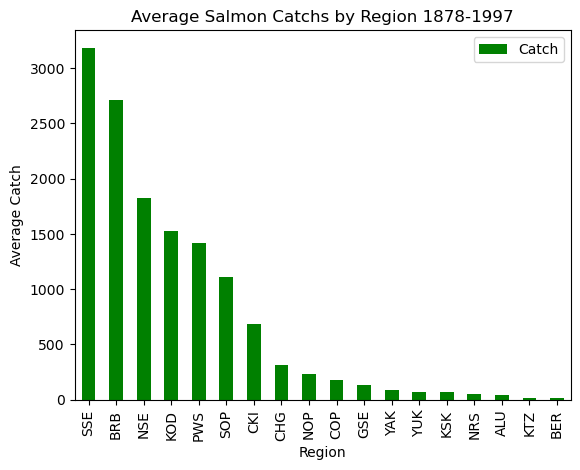

In [ ]:
# Create barplot of avg_region dataframe
avg_region.plot(kind = 'bar',
                y = 'Catch',
                title = 'Average Commercial Salmon Catchs by Management Region 1878-1997',
                xlabel = 'Region',
                ylabel = 'Average Catch',
                color = 'green')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

    Based on the figure above, the highest average salmon catches are in Southern Southeast Alaska, and Bristol Bay Management Area. There are comparable but lighter average catches in Northern Southeast Alaska, Kodiak Management Area, Prince William Sound Subarea, Southern Peninsula Subarea, and Cook Inlet Managment area. Based on this graph, it's fair to assume that more than half of the total Salmon catches in all 18 regions take place in the top 3 regions. Southern Southeast, Bristol Bay, and Northern Southeast Alaska.
    

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!